In [53]:
import warnings
warnings.filterwarnings('ignore')

In [54]:
import json
dir(json)

['JSONDecodeError',
 'JSONDecoder',
 'JSONEncoder',
 '__all__',
 '__author__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_default_decoder',
 '_default_encoder',
 'codecs',
 'decoder',
 'detect_encoding',
 'dump',
 'dumps',
 'encoder',
 'load',
 'loads',
 'scanner']

In [55]:
#loading the file
import os
os.chdir('C:\\Users\\v-paszaf\\Desktop')
lines = []
for line in open('customers.txt', 'r'):
    lines.append(json.loads(line))

In [56]:
lines[0]

{'fraudulent': False,
 'customer': {'customerEmail': 'josephhoward@yahoo.com',
  'customerPhone': '400-108-5415',
  'customerDevice': 'yyeiaxpltf82440jnb3v',
  'customerIPAddress': '8.129.104.40',
  'customerBillingAddress': '5493 Jones Islands\nBrownside, CA 51896'},
 'orders': [{'orderId': 'vjbdvd',
   'orderAmount': 18,
   'orderState': 'pending',
   'orderShippingAddress': '5493 Jones Islands\nBrownside, CA 51896'},
  {'orderId': 'yp6x27',
   'orderAmount': 26,
   'orderState': 'fulfilled',
   'orderShippingAddress': '5493 Jones Islands\nBrownside, CA 51896'}],
 'paymentMethods': [{'paymentMethodId': 'wt07xm68b',
   'paymentMethodRegistrationFailure': True,
   'paymentMethodType': 'card',
   'paymentMethodProvider': 'JCB 16 digit',
   'paymentMethodIssuer': 'Citizens First Banks'}],
 'transactions': [{'transactionId': 'a9lcj51r',
   'orderId': 'vjbdvd',
   'paymentMethodId': 'wt07xm68b',
   'transactionAmount': 18,
   'transactionFailed': False},
  {'transactionId': 'y4wcv03i',
   

In [5]:
for i in lines[1]:
    print(i)

fraudulent
customer
orders
paymentMethods
transactions


In [57]:
import pandas as pd

In [58]:
df_raw = pd.DataFrame(lines)

In [8]:
from itertools import chain, starmap


def flatten_json_iterative_solution(dictionary):
    

    def unpack(parent_key, parent_value):
       
        
        if isinstance(parent_value, dict):
            for key, value in parent_value.items():
                temp1 = parent_key + '_' + key
                yield temp1, value
        elif isinstance(parent_value, list):
            i = 0 
            for value in parent_value:
                temp2 = parent_key + '_'+str(i) 
                i += 1
                yield temp2, value
        else:
            yield parent_key, parent_value    

            
    while True:
        dictionary = dict(chain.from_iterable(starmap(unpack, dictionary.items())))
        if not any(isinstance(value, dict) for value in dictionary.values()) and \
           not any(isinstance(value, list) for value in dictionary.values()):
            break

    return dictionary

In [ ]:
flatten_json_iterative_solution(df)

In [8]:
df_raw.head()

,customer,fraudulent,orders,paymentMethods,transactions
0,"{'customerEmail': 'josephhoward@yahoo.com', 'c...",False,"[{'orderId': 'vjbdvd', 'orderAmount': 18, 'ord...","[{'paymentMethodId': 'wt07xm68b', 'paymentMeth...","[{'transactionId': 'a9lcj51r', 'orderId': 'vjb..."
1,"{'customerEmail': 'evansjeffery@yahoo.com', 'c...",True,"[{'orderId': 'nlghpa', 'orderAmount': 45, 'ord...","[{'paymentMethodId': 'y3xp697jx', 'paymentMeth...","[{'transactionId': '5mi94sfw', 'orderId': 'nlg..."
2,"{'customerEmail': 'andersonwilliam@yahoo.com',...",False,"[{'orderId': 'yk34y2', 'orderAmount': 33, 'ord...","[{'paymentMethodId': '8pneoi03z', 'paymentMeth...","[{'transactionId': 'q3lyvbza', 'orderId': 'yk3..."
3,"{'customerEmail': 'rubenjuarez@yahoo.com', 'cu...",False,"[{'orderId': 'fbz9ep', 'orderAmount': 34, 'ord...","[{'paymentMethodId': 'pdxjdwui4', 'paymentMeth...","[{'transactionId': 'vx4cjc27', 'orderId': 'fbz..."
4,"{'customerEmail': 'uchen@malone.com', 'custome...",True,"[{'orderId': '56h7iw', 'orderAmount': 71, 'ord...","[{'paymentMethodId': 'w1i1zq3rg', 'paymentMeth...","[{'transactionId': 'q8j3dgni', 'orderId': '56h..."


In [9]:
type(df_raw.iloc[2,0])

dict

In [11]:
df_raw.iloc[1,:]

customer          {'customerEmail': 'evansjeffery@yahoo.com', 'c...
fraudulent                                                     True
orders            [{'orderId': 'nlghpa', 'orderAmount': 45, 'ord...
paymentMethods    [{'paymentMethodId': 'y3xp697jx', 'paymentMeth...
transactions      [{'transactionId': '5mi94sfw', 'orderId': 'nlg...
Name: 1, dtype: object

In [12]:
#Our dataset contains 168 rows
len(df_raw)

168

In [59]:
df1 = pd.DataFrame([md for md in df_raw.customer])

In [11]:
df1.head()

,customerBillingAddress,customerDevice,customerEmail,customerIPAddress,customerPhone
0,"5493 Jones Islands\nBrownside, CA 51896",yyeiaxpltf82440jnb3v,josephhoward@yahoo.com,8.129.104.40,400-108-5415
1,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,r0jpm7xaeqqa3kr6mzum,evansjeffery@yahoo.com,219.173.211.202,1-788-091-7546
2,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",4m7h5ipl1shyavt6vv2r,andersonwilliam@yahoo.com,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,024.420.0375
3,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",slovx60t0i558may4ks0,rubenjuarez@yahoo.com,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,670.664.8168x94985
4,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",j0pd24k5h8dl2fqu0cz4,uchen@malone.com,196.89.235.192,1-981-877-0870


In [15]:
type(df1.iloc[1,:].value_counts())

pandas.core.series.Series

### Our variables do not say to much us, let's try to extract some fatures out of them

In [60]:
a = []
for i in range(len(df1)):
    a.append(df1['customerBillingAddress'][i].split()[-2])

print(a)

['CA', 'NM', 'PR', 'FM', 'TN', 'OR', 'AR', 'WI', 'AE', 'ID', 'MN', 'DC', 'ND', 'IL', 'SD', 'NH', 'MH', 'MN', 'ND', 'TN', 'SD', 'WY', 'ND', 'GU', 'NE', 'GU', 'UT', 'AA', 'CT', 'MH', 'DE', 'LA', 'NE', 'FM', 'VA', 'KY', 'SC', 'NM', 'MT', 'AS', 'IN', 'IA', 'AE', 'DE', 'SC', 'IL', 'LA', 'ID', 'NC', 'MT', 'MS', 'AL', 'ME', 'SC', 'SC', 'OR', 'KY', 'MH', 'AS', 'AZ', 'KS', 'AS', 'LA', 'FM', 'LA', 'OR', 'MO', 'AE', 'NV', 'OH', 'AL', 'AP', 'AS', 'ME', 'PA', 'IN', 'WA', 'GA', 'PA', 'HI', 'MH', 'VT', 'OK', 'VI', 'ID', 'FL', 'DC', 'IA', 'CO', 'WA', 'MH', 'NH', 'NH', 'GA', 'IA', 'ME', 'AR', 'AA', 'WV', 'AL', 'CA', 'IL', 'OH', 'OK', 'MA', 'NM', 'MN', 'LA', 'AK', 'AP', 'CT', 'ND', 'CT', 'KS', 'WI', 'UT', 'MN', 'OH', 'MN', 'GA', 'AP', 'WA', 'IN', 'AA', 'MP', 'NH', 'GU', 'NJ', 'IA', 'IA', 'MN', 'FL', 'AE', 'NE', 'FM', 'MA', 'WV', 'VI', 'PW', 'PA', 'CA', 'CA', 'UT', 'AE', 'AR', 'AP', 'PR', 'KY', 'WY', 'ME', 'IL', 'NC', 'HI', 'MH', 'AP', 'IN', 'CO', 'MA', 'OR', 'SC', 'FM', 'VA', 'ID', 'OR', 'AZ', 'OK', 'IL

In [62]:
df1['state'] = a
df1['fraud'] = df_raw['fraudulent']

In [63]:
df1.head()

,customerBillingAddress,customerDevice,customerEmail,customerIPAddress,customerPhone,state,fraud
0,"5493 Jones Islands\nBrownside, CA 51896",yyeiaxpltf82440jnb3v,josephhoward@yahoo.com,8.129.104.40,400-108-5415,CA,False
1,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,r0jpm7xaeqqa3kr6mzum,evansjeffery@yahoo.com,219.173.211.202,1-788-091-7546,NM,True
2,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",4m7h5ipl1shyavt6vv2r,andersonwilliam@yahoo.com,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,024.420.0375,PR,False
3,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",slovx60t0i558may4ks0,rubenjuarez@yahoo.com,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,670.664.8168x94985,FM,False
4,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",j0pd24k5h8dl2fqu0cz4,uchen@malone.com,196.89.235.192,1-981-877-0870,TN,True


In [64]:
c= []

for i in range(len(df1)):
    c.append(df1['customerEmail'][i].split("@")[1])

In [65]:
c[0:10]

['yahoo.com',
 'yahoo.com',
 'yahoo.com',
 'yahoo.com',
 'malone.com',
 'dunn.com',
 'saunders-rhodes.com',
 'gmail.com',
 'rodriguez.com',
 'rivera-parker.info']

In [66]:
d = []
for i in range(len(c)):
    d.append(c[i].split(".")[0])

In [23]:
d[0:10]

['yahoo',
 'yahoo',
 'yahoo',
 'yahoo',
 'malone',
 'dunn',
 'saunders-rhodes',
 'gmail',
 'rodriguez',
 'rivera-parker']

In [67]:
df1['mail'] = d

In [25]:
df1.head()

,customerBillingAddress,customerDevice,customerEmail,customerIPAddress,customerPhone,state,fraud,mail
0,"5493 Jones Islands\nBrownside, CA 51896",yyeiaxpltf82440jnb3v,josephhoward@yahoo.com,8.129.104.40,400-108-5415,CA,False,yahoo
1,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,r0jpm7xaeqqa3kr6mzum,evansjeffery@yahoo.com,219.173.211.202,1-788-091-7546,NM,True,yahoo
2,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",4m7h5ipl1shyavt6vv2r,andersonwilliam@yahoo.com,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,024.420.0375,PR,False,yahoo
3,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",slovx60t0i558may4ks0,rubenjuarez@yahoo.com,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,670.664.8168x94985,FM,False,yahoo
4,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",j0pd24k5h8dl2fqu0cz4,uchen@malone.com,196.89.235.192,1-981-877-0870,TN,True,malone


In [68]:
# We tune our fetures to get any value informatio
# e.g. just phone number is no very useful
df1['phone_len'] = df1['customerPhone'].apply(lambda x: len(x))
df1['IP_len'] = df1['customerIPAddress'].apply(lambda x: len(x))

In [69]:
df1.head()

,customerBillingAddress,customerDevice,customerEmail,customerIPAddress,customerPhone,state,fraud,mail,phone_len,IP_len
0,"5493 Jones Islands\nBrownside, CA 51896",yyeiaxpltf82440jnb3v,josephhoward@yahoo.com,8.129.104.40,400-108-5415,CA,False,yahoo,12,12
1,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,r0jpm7xaeqqa3kr6mzum,evansjeffery@yahoo.com,219.173.211.202,1-788-091-7546,NM,True,yahoo,14,15
2,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",4m7h5ipl1shyavt6vv2r,andersonwilliam@yahoo.com,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,024.420.0375,PR,False,yahoo,12,39
3,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",slovx60t0i558may4ks0,rubenjuarez@yahoo.com,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,670.664.8168x94985,FM,False,yahoo,18,39
4,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",j0pd24k5h8dl2fqu0cz4,uchen@malone.com,196.89.235.192,1-981-877-0870,TN,True,malone,14,14


### Now We can drop variables which are useless already

In [70]:
df1.drop(df1.iloc[:, 1:5], axis = 1, inplace=True)
df1.head()

,customerBillingAddress,state,fraud,mail,phone_len,IP_len
0,"5493 Jones Islands\nBrownside, CA 51896",CA,False,yahoo,12,12
1,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,NM,True,yahoo,14,15
2,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",PR,False,yahoo,12,39
3,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",FM,False,yahoo,18,39
4,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",TN,True,malone,14,14


In [71]:
#convert our target variable to categorical
to_cat = {False: 0, True:1}
df1['fraud'] = df1['fraud'].map(to_cat)

In [72]:
df1.head()

,customerBillingAddress,state,fraud,mail,phone_len,IP_len
0,"5493 Jones Islands\nBrownside, CA 51896",CA,0,yahoo,12,12
1,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,NM,1,yahoo,14,15
2,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",PR,0,yahoo,12,39
3,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",FM,0,yahoo,18,39
4,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",TN,1,malone,14,14


In [73]:
df1 =  df1.rename(columns = {'customerBillingAddress': 'address'})

In [74]:
df1.head()

,address,state,fraud,mail,phone_len,IP_len
0,"5493 Jones Islands\nBrownside, CA 51896",CA,0,yahoo,12,12
1,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,NM,1,yahoo,14,15
2,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",PR,0,yahoo,12,39
3,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",FM,0,yahoo,18,39
4,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",TN,1,malone,14,14


In [75]:
#dropping the 'customer' and 'fraudalent' as they are preprocessed and stored into df1 
df_raw.drop(['customer', 'fraudulent'], axis = 1, inplace=True)

In [367]:
# Now it's time to covert the rest values into dataframe columns
# Below is the function to execute it

In [76]:
df.head()

,bitcoin,paypal,apple_pay,failed,fulfill,pending,transaction_failed,Sum_Payment_failure,sum_order_amount,weird_payment_issuer,number_of_transactions,index,fraud,phone_len,IP_len
0,0,0,0,0,1,1,0,1,44,0,1.0,1,0,12,12
1,1,0,0,0,3,0,1,1,111,0,7.0,2,1,14,15
2,0,0,0,1,2,0,2,0,82,0,2.0,3,0,12,39
3,0,0,0,0,3,0,0,0,85,0,1.0,4,0,18,39
4,0,0,1,1,6,0,2,0,411,0,6.0,5,1,14,14


In [ ]:
#Those 4 columns above I decided to process in excel as it's easier for me 
# So it's time to import dataframe with those columns

In [77]:
df = pd.read_csv('convertcsv.csv')
df.head()

,bitcoin,paypal,apple_pay,failed,fulfill,pending,transaction_failed,Sum_Payment_failure,sum_order_amount,weird_payment_issuer,number_of_transactions
0,0,0,0,0,1,1,0,1,44,0,1.0
1,1,0,0,0,3,0,1,1,111,0,7.0
2,0,0,0,1,2,0,2,0,82,0,2.0
3,0,0,0,0,3,0,0,0,85,0,1.0
4,0,0,1,1,6,0,2,0,411,0,6.0


In [ ]:
#The imported dataset contains 13 variables:

# bitcoin: if it's 1 - customer paid bitcoin most often
# paypal: if it's 1 - customer paid paypal most often
# apple_pay: if it's 1 - customer paid apple_pay most often
   ## for the above if a customer have 1 in more than one type of payment it means ##
   ## he paid those methods equal times ##
# failed: how many order states have a status failed
# fulfill: how many order states have a status fulfilled
# panding: how many order states have a status pending
# transaction_failed: how many times transaction failed
# Sum_Payment_failure: how many times payment failed
# sum_order_amount: total amount of the orders
# 	weird_payment_issuer: I noticed during data cleaning into excel that
# customers which used payment provider like ('x', 'B', 'A') they are always fraudulents
# number_of_transactions: how many transactions customer made

In [78]:
df1.head()

,address,state,fraud,mail,phone_len,IP_len
0,"5493 Jones Islands\nBrownside, CA 51896",CA,0,yahoo,12,12
1,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,NM,1,yahoo,14,15
2,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",PR,0,yahoo,12,39
3,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",FM,0,yahoo,18,39
4,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",TN,1,malone,14,14


In [79]:
#We can drop address variable from our table df1 as we already extracted out of it needed value
df1.drop(['address'], axis =1, inplace = True)

In [27]:
df1.head()

,state,fraud,mail,phone_len,IP_len
0,CA,0,yahoo,12,12
1,NM,1,yahoo,14,15
2,PR,0,yahoo,12,39
3,FM,0,yahoo,18,39
4,TN,1,malone,14,14


In [80]:
# It's time to merge our table to one to do this we need one common value so in
# both tables I created index column to anable join
index = range(1,169)
df1['index'] = index   
df['index'] = index    

In [81]:
df = pd.merge(df, df1, on = 'index', how = 'outer')

In [82]:
df.head()

,bitcoin,paypal,apple_pay,failed,fulfill,pending,transaction_failed,Sum_Payment_failure,sum_order_amount,weird_payment_issuer,number_of_transactions,index,state,fraud,mail,phone_len,IP_len
0,0,0,0,0,1,1,0,1,44,0,1.0,1,CA,0,yahoo,12,12
1,1,0,0,0,3,0,1,1,111,0,7.0,2,NM,1,yahoo,14,15
2,0,0,0,1,2,0,2,0,82,0,2.0,3,PR,0,yahoo,12,39
3,0,0,0,0,3,0,0,0,85,0,1.0,4,FM,0,yahoo,18,39
4,0,0,1,1,6,0,2,0,411,0,6.0,5,TN,1,malone,14,14


In [83]:
#Now We can drop index value as it's useless now
df.drop(['index'], axis = 1, inplace=True)

## EXPLORATORY DATA ANALYSIS

In [84]:
# importing libraries for EDA
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [84]:
# As We can see there is more no fraud than fraud
# So We have to keep it mind when looking at the plots
df['fraud'].value_counts()

0    107
1     61
Name: fraud, dtype: int64

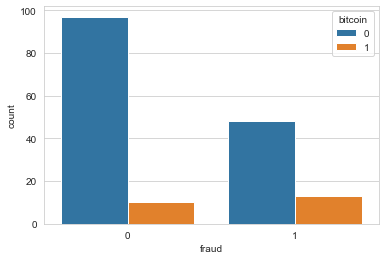

In [85]:
sns.set_style('whitegrid')
sns.countplot(x='fraud',hue='bitcoin',data=df)

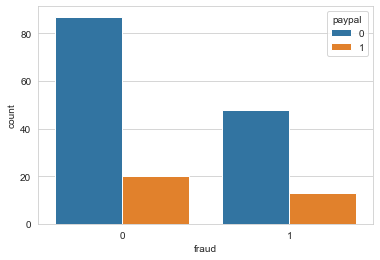

In [86]:
sns.set_style('whitegrid')
sns.countplot(x='fraud',hue='paypal',data=df)

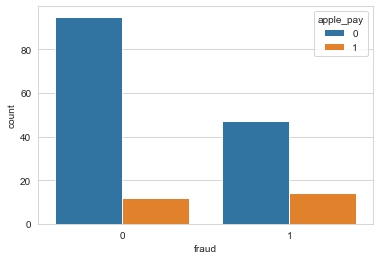

In [87]:
sns.set_style('whitegrid')
sns.countplot(x='fraud',hue='apple_pay',data=df)

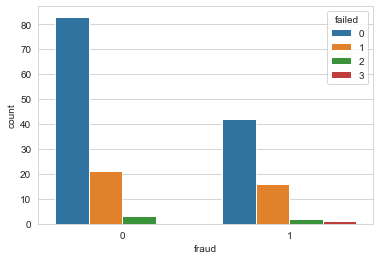

In [78]:
sns.set_style('whitegrid')
sns.countplot(x='fraud',hue='failed',data=df)

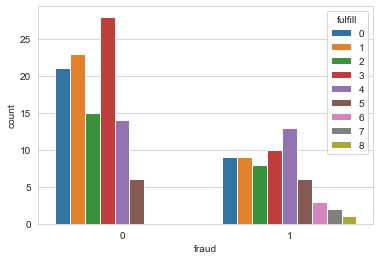

In [88]:
sns.set_style('whitegrid')
sns.countplot(x='fraud',hue='fulfill',data=df)

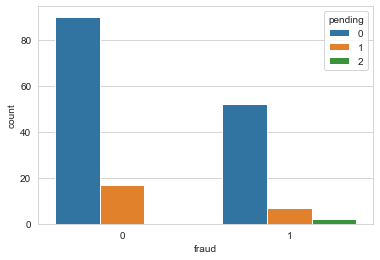

In [89]:
sns.set_style('whitegrid')
sns.countplot(x='fraud',hue='pending',data=df)

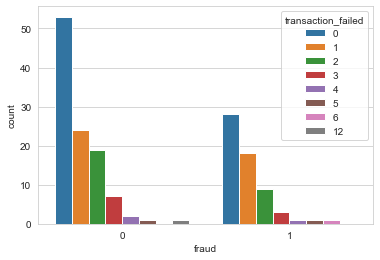

In [91]:
sns.set_style('whitegrid')
sns.countplot(x='fraud',hue='transaction_failed',data=df)

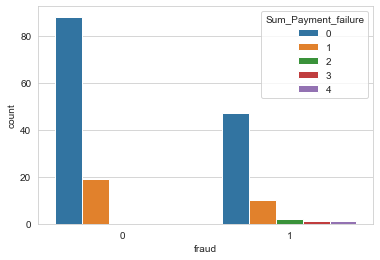

In [97]:
sns.set_style('whitegrid')
sns.countplot(x='fraud',hue='Sum_Payment_failure',data=df)

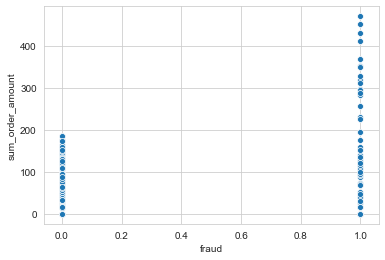

In [108]:
# Here We can see issue finally,
# There seems to be correlation between fraudulents and the amount they ordered
# The more customer order the more propably he is a frauder
# We can also see that there is no fraudulent with order amount over 200
sns.scatterplot(x="fraud", y="sum_order_amount", data=df)

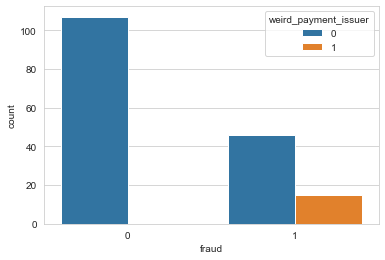

In [110]:
# That's what I already mentioned
# There are fraudulent customers which use payment issuers
sns.set_style('whitegrid')
sns.countplot(x='fraud',hue='weird_payment_issuer',data=df)

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='fraud',hue='weird_payment_issuer',data=df)

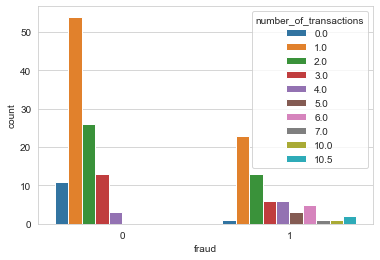

In [111]:
sns.set_style('whitegrid')
sns.countplot(x='fraud',hue='number_of_transactions',data=df)

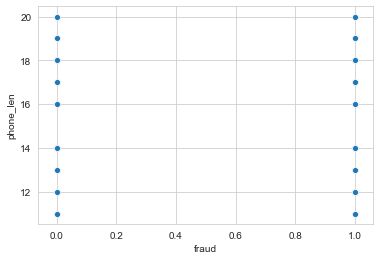

In [112]:
sns.scatterplot(x="fraud", y="phone_len", data=df)

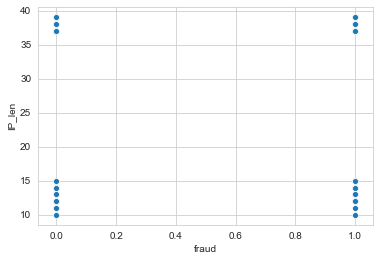

In [114]:
sns.scatterplot(x="fraud", y="IP_len", data=df)

In [117]:
#Now let's look at the raltion between fraud and mail
df_temp = df[['fraud', 'mail']]
df_temp.groupby(['mail']).mean()

,fraud
mail,
1jcfcxs7,1.000000
6eph,1.000000
arnold,1.000000
atkinson,0.000000
bell,0.000000
brewer-jones,1.000000
brown,1.000000
chavez,0.000000
clark,0.000000


In [118]:
# The same with state
df_temp = df[['fraud', 'state']]
df_temp.groupby(['state']).mean()

,fraud
state,
AA,0.333333
AE,0.000000
AK,1.000000
AL,0.333333
AP,0.200000
AR,1.000000
AS,0.000000
AZ,0.500000
CA,0.250000


In [ ]:
# EDA Conclusions:
# Most of the values have similar distributions in relation to fraud 
# except order amount and weird name of payment provider
# It's easy to see that customers that order more than 200 of amount are frauds
# The same is when they use weird payment provider
# So based on the analysis above:
# If the customer ordered more than 200 he is a fraud
# If the customer used at least once weird payment provider is a fraud

## CREATING THE MODEL

In [119]:
df.head()

,bitcoin,paypal,apple_pay,failed,fulfill,pending,transaction_failed,Sum_Payment_failure,sum_order_amount,weird_payment_issuer,number_of_transactions,state,fraud,mail,phone_len,IP_len
0,0,0,0,0,1,1,0,1,44,0,1.0,CA,0,yahoo,12,12
1,1,0,0,0,3,0,1,1,111,0,7.0,NM,1,yahoo,14,15
2,0,0,0,1,2,0,2,0,82,0,2.0,PR,0,yahoo,12,39
3,0,0,0,0,3,0,0,0,85,0,1.0,FM,0,yahoo,18,39
4,0,0,1,1,6,0,2,0,411,0,6.0,TN,1,malone,14,14


In [ ]:
# As We cannot apply string to the model We can use Scikit learn CountVectorizer
# but as it's not have bigger impact on our dependent variable I decided to remove it from dataframe

In [85]:
df.drop(['state'], axis =1, inplace = True)
df.drop(['mail'], axis =1, inplace = True)
df.head()

,bitcoin,paypal,apple_pay,failed,fulfill,pending,transaction_failed,Sum_Payment_failure,sum_order_amount,weird_payment_issuer,number_of_transactions,fraud,phone_len,IP_len
0,0,0,0,0,1,1,0,1,44,0,1.0,0,12,12
1,1,0,0,0,3,0,1,1,111,0,7.0,1,14,15
2,0,0,0,1,2,0,2,0,82,0,2.0,0,12,39
3,0,0,0,0,3,0,0,0,85,0,1.0,0,18,39
4,0,0,1,1,6,0,2,0,411,0,6.0,1,14,14


In [86]:
X = df.drop(['fraud'], axis =1).values
y = df['fraud'].values

In [34]:
# Scaling values:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [35]:
X = sc.fit_transform(X)

In [ ]:
##########################################################################################################3

In [94]:
##################################################   SOM    ######################################################

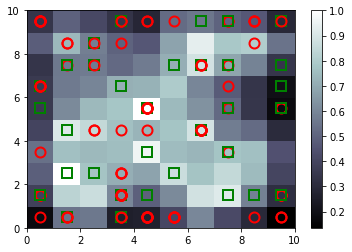

In [91]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

# Training the SOM
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 13, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

# Finding the frauds


In [93]:
mappings = som.win_map(X)


In [ ]:
frauds = np.concatenate((mappings[(8,1)], mappings[(6,8)]), axis = 0)
frauds = sc.inverse_transform(frauds)

In [ ]:
######################################################################################################################

In [36]:
# Let's play a bit and verify our data on couple algorithms to see which one perform the best
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn.model_selection import cross_validate

In [37]:
def models():
    return [
        ('Logistic Regression', LogisticRegression()),
        ('Decision Tree', DecisionTreeClassifier()),
        ('Random Forest', RandomForestClassifier()),
        ('Extra Trees', ExtraTreesClassifier()),
        ('XGboost', GradientBoostingClassifier()),
        ('Naive Bayes', GaussianNB()),
        ('SVC', SVC()),
        ('AdaBoost', AdaBoostClassifier()),
        ('KNN', KNeighborsClassifier())
    ]

In [38]:
def plot_result(model_name, result, ylim=(0, 1.)):
    mean_train = np.round( np.mean(result['train_score']), 2)
    mean_test = np.round( np.mean(result['test_score']), 2)
    
    plt.title('{0}: cross validation\nmean-train-acc:{1}\nmean-test-acc:{2}'.format(model_name, mean_train, mean_test))
    plt.plot( result['train_score'], 'r-o', label="train" )
    plt.plot( result['test_score'], 'g-o', label="test" )
    plt.legend(loc='best')
    plt.ylabel('Accuracy')
    plt.xlabel('# of fold')
    plt.ylim(*ylim)
    plt.show()

Logistic Regression


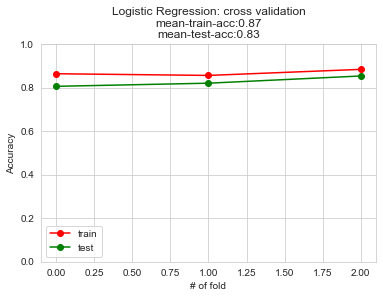

Decision Tree


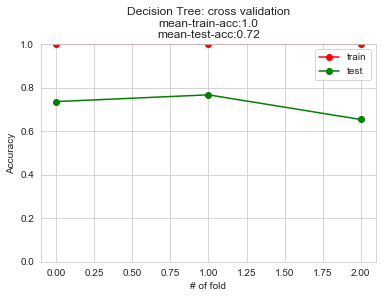

Random Forest


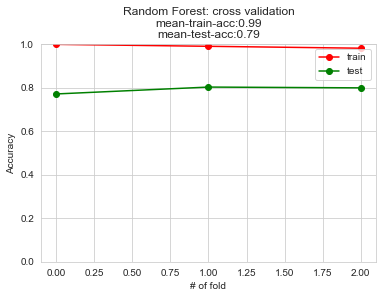

Extra Trees


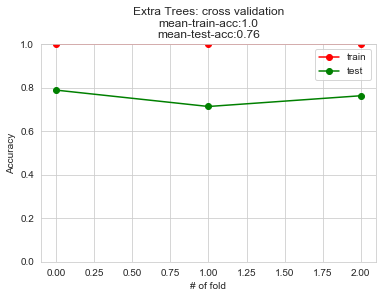

XGboost


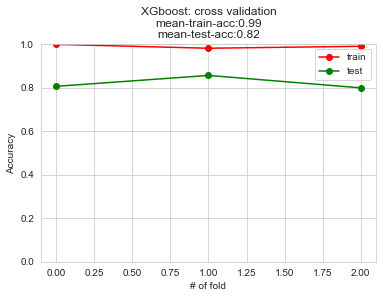

Naive Bayes


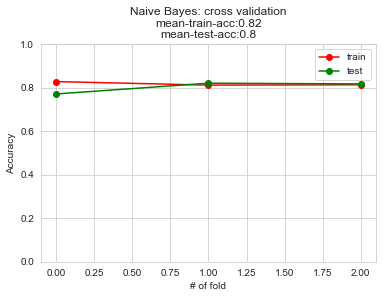

SVC


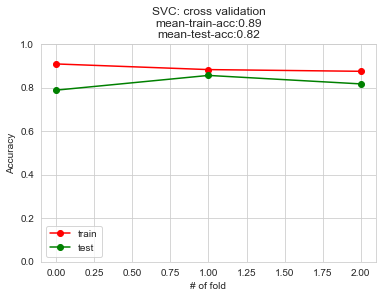

AdaBoost


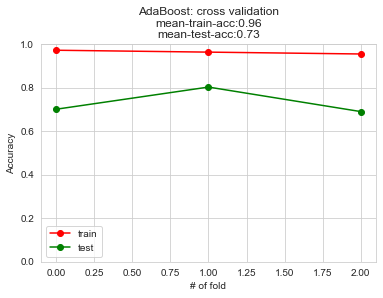

KNN


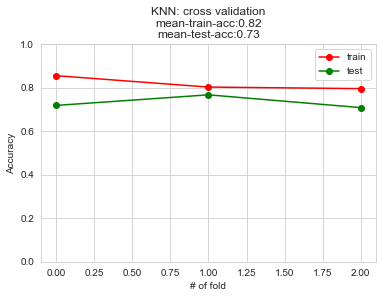

In [133]:
for model_name, model in models():
    result = cross_validate(model, X, y, scoring='accuracy', cv=3, return_estimator=True, return_train_score= True)
    print(model_name)

    plot_result(model_name, result)

In [39]:
#It looks like the best performance on test data has Logistic regression
# Let's try to tune the model with grid search to find the best hyperparameters
# but before splitting data on training and test set
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.33, random_state=42)

In [135]:
# providing parameters to find out which ones are the best
param_log={
           "C":np.logspace(-3,3,7),
           "penalty":["l1","l2"]
           }

In [140]:
logreg=LogisticRegression()
logreg_grid=GridSearchCV(logreg,param_log,cv=10)
logreg_grid.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_grid.best_params_)
print("accuracy :",logreg_grid.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'penalty': 'l2'}
accuracy : 0.8303571428571429


C:\Users\v-paszaf\AppData\Local\Continuum\anaconda3\envs\tensorflow_gpuenv\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [141]:
scores_log = cross_validate(logreg_grid, X_train, y_train, cv=3)

C:\Users\v-paszaf\AppData\Local\Continuum\anaconda3\envs\tensorflow_gpuenv\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\v-paszaf\AppData\Local\Continuum\anaconda3\envs\tensorflow_gpuenv\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\v-paszaf\AppData\Local\Continuum\anaconda3\envs\tensorflow_gpuenv\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results

In [142]:
cross_validate(logreg_grid, X_train, y_train, scoring='roc_auc', cv=3, return_estimator=True, return_train_score= True)

C:\Users\v-paszaf\AppData\Local\Continuum\anaconda3\envs\tensorflow_gpuenv\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\v-paszaf\AppData\Local\Continuum\anaconda3\envs\tensorflow_gpuenv\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\v-paszaf\AppData\Local\Continuum\anaconda3\envs\tensorflow_gpuenv\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results

{'fit_time': array([0.1899972 , 0.15996552, 0.17699742]),
 'score_time': array([0.00403547, 0.00103164, 0.00099874]),
 'estimator': (GridSearchCV(cv=10, error_score='raise-deprecating',
               estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                            fit_intercept=True,
                                            intercept_scaling=1, l1_ratio=None,
                                            max_iter=100, multi_class='warn',
                                            n_jobs=None, penalty='l2',
                                            random_state=None, solver='warn',
                                            tol=0.0001, verbose=0,
                                            warm_start=False),
               iid='warn', n_jobs=None,
               param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                           'penalty': ['l1', 'l2']},
               pre_dispatch='2*n_jobs', r

In [143]:
print('scores for cross validation of Logistic Regression after grid search:')
print('cross validation test score:',scores_log['test_score']), 
print('test score mean:', np.round(scores_log['test_score'].mean(), 4),'±', np.round(scores_log['test_score'].std(), 4))

scores for cross validation of Logistic Regression after grid search:
cross validation test score: [0.86842105 0.83783784 0.75675676]
test score mean: 0.821 ± 0.0471


In [ ]:
# After grid search any changes cannot be seen so it looks like
# our model cannot do better than that

In [ ]:
# Now let's see how Neural Networks will perform on our data

In [40]:
#importing required dependencies 
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dense
from keras.optimizers import Adam, SGD
from keras.wrappers.scikit_learn import KerasClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras import optimizers

Using TensorFlow backend.


In [41]:
model = keras.Sequential([
    # `input_shape` is only required here so that `.summary` works.
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(X_train.shape[1],)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

model.summary()

W0905 15:53:10.691928 24788 deprecation.py:506] From C:\Users\v-paszaf\AppData\Local\Continuum\anaconda3\envs\tensorflow_gpuenv\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0905 15:53:11.063937 24788 deprecation.py:323] From C:\Users\v-paszaf\AppData\Local\Continuum\anaconda3\envs\tensorflow_gpuenv\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                240       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 529
Trainable params: 529
Non-trainable params: 0
_________________________________________________________________


In [47]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(112, 14) (56, 14) (112,) (56,)


In [45]:
baseline_history = model.fit(X_train,
                                      X_test,
                                      epochs=20,
                                      batch_size=16,
                                      validation_data=(y_train, y_test),
                                      verbose=2)

ValueError: Input arrays should have the same number of samples as target arrays. Found 112 input samples and 56 target samples.

In [51]:
result = model.evaluate(X_test, y_test)

56/56 [==============================] - 0s 72us/sample - loss: 1.8071 - acc: 0.7500 - binary_crossentropy: 1.8071


In [49]:
historydf = pd.DataFrame(history.history, index=history.epoch)

Text(0.5, 1.0, 'Test accuracy: 75.0 %')

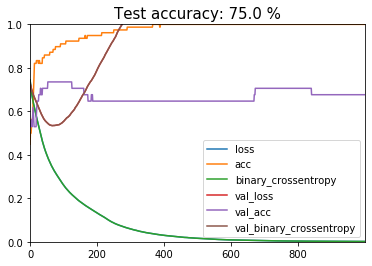

In [52]:

historydf.plot(ylim=(0,1))
plt.title("Test accuracy: {:3.1f} %".format(result[1]*100), fontsize=15)

In [42]:
history = model.fit(X_train, y_train, epochs=1000, verbose=1, validation_split=0.3)

Train on 78 samples, validate on 34 samples
Epoch 1/1000
78/78 [==============================] - 0s 4ms/sample - loss: 0.7449 - acc: 0.4487 - binary_crossentropy: 0.7449 - val_loss: 0.7293 - val_acc: 0.5588 - val_binary_crossentropy: 0.7293
Epoch 2/1000
78/78 [==============================] - 0s 141us/sample - loss: 0.7290 - acc: 0.5000 - binary_crossentropy: 0.7290 - val_loss: 0.7223 - val_acc: 0.5588 - val_binary_crossentropy: 0.7223
Epoch 3/1000
78/78 [==============================] - 0s 141us/sample - loss: 0.7167 - acc: 0.5000 - binary_crossentropy: 0.7167 - val_loss: 0.7157 - val_acc: 0.5294 - val_binary_crossentropy: 0.7157
Epoch 4/1000
78/78 [==============================] - 0s 372us/sample - loss: 0.7046 - acc: 0.5000 - binary_crossentropy: 0.7046 - val_loss: 0.7095 - val_acc: 0.5294 - val_binary_crossentropy: 0.7095
Epoch 5/1000
78/78 [==============================] - 0s 180us/sample - loss: 0.6930 - acc: 0.5256 - binary_crossentropy: 0.6930 - val_loss: 0.7039 - val_acc:

Epoch 41/1000
78/78 [==============================] - 0s 205us/sample - loss: 0.4451 - acc: 0.8462 - binary_crossentropy: 0.4451 - val_loss: 0.5678 - val_acc: 0.7059 - val_binary_crossentropy: 0.5678
Epoch 42/1000
78/78 [==============================] - 0s 205us/sample - loss: 0.4394 - acc: 0.8462 - binary_crossentropy: 0.4394 - val_loss: 0.5654 - val_acc: 0.7059 - val_binary_crossentropy: 0.5654
Epoch 43/1000
78/78 [==============================] - 0s 256us/sample - loss: 0.4351 - acc: 0.8462 - binary_crossentropy: 0.4351 - val_loss: 0.5631 - val_acc: 0.7059 - val_binary_crossentropy: 0.5631
Epoch 44/1000
78/78 [==============================] - 0s 256us/sample - loss: 0.4299 - acc: 0.8590 - binary_crossentropy: 0.4299 - val_loss: 0.5610 - val_acc: 0.7059 - val_binary_crossentropy: 0.5610
Epoch 45/1000
78/78 [==============================] - 0s 205us/sample - loss: 0.4251 - acc: 0.8590 - binary_crossentropy: 0.4251 - val_loss: 0.5589 - val_acc: 0.7059 - val_binary_crossentropy: 0.

Epoch 82/1000
78/78 [==============================] - 0s 257us/sample - loss: 0.3045 - acc: 0.8974 - binary_crossentropy: 0.3045 - val_loss: 0.5371 - val_acc: 0.7353 - val_binary_crossentropy: 0.5371
Epoch 83/1000
78/78 [==============================] - 0s 231us/sample - loss: 0.3022 - acc: 0.8974 - binary_crossentropy: 0.3022 - val_loss: 0.5376 - val_acc: 0.7353 - val_binary_crossentropy: 0.5376
Epoch 84/1000
78/78 [==============================] - 0s 282us/sample - loss: 0.2999 - acc: 0.8974 - binary_crossentropy: 0.2999 - val_loss: 0.5374 - val_acc: 0.7353 - val_binary_crossentropy: 0.5374
Epoch 85/1000
78/78 [==============================] - 0s 218us/sample - loss: 0.2976 - acc: 0.8974 - binary_crossentropy: 0.2976 - val_loss: 0.5376 - val_acc: 0.7353 - val_binary_crossentropy: 0.5376
Epoch 86/1000
78/78 [==============================] - 0s 269us/sample - loss: 0.2952 - acc: 0.8974 - binary_crossentropy: 0.2952 - val_loss: 0.5380 - val_acc: 0.7353 - val_binary_crossentropy: 0.

Epoch 123/1000
78/78 [==============================] - ETA: 0s - loss: 0.2772 - acc: 0.8750 - binary_crossentropy: 0.277 - 0s 218us/sample - loss: 0.2214 - acc: 0.9231 - binary_crossentropy: 0.2214 - val_loss: 0.5902 - val_acc: 0.7353 - val_binary_crossentropy: 0.5902
Epoch 124/1000
78/78 [==============================] - 0s 256us/sample - loss: 0.2199 - acc: 0.9231 - binary_crossentropy: 0.2199 - val_loss: 0.5921 - val_acc: 0.7353 - val_binary_crossentropy: 0.5921
Epoch 125/1000
78/78 [==============================] - 0s 205us/sample - loss: 0.2183 - acc: 0.9231 - binary_crossentropy: 0.2183 - val_loss: 0.5938 - val_acc: 0.7353 - val_binary_crossentropy: 0.5938
Epoch 126/1000
78/78 [==============================] - 0s 231us/sample - loss: 0.2170 - acc: 0.9231 - binary_crossentropy: 0.2170 - val_loss: 0.5956 - val_acc: 0.7059 - val_binary_crossentropy: 0.5956
Epoch 127/1000
78/78 [==============================] - ETA: 0s - loss: 0.2261 - acc: 0.9375 - binary_crossentropy: 0.226 - 

Epoch 163/1000
78/78 [==============================] - 0s 231us/sample - loss: 0.1702 - acc: 0.9359 - binary_crossentropy: 0.1702 - val_loss: 0.6859 - val_acc: 0.6765 - val_binary_crossentropy: 0.6859
Epoch 164/1000
78/78 [==============================] - 0s 269us/sample - loss: 0.1692 - acc: 0.9359 - binary_crossentropy: 0.1692 - val_loss: 0.6887 - val_acc: 0.6765 - val_binary_crossentropy: 0.6887
Epoch 165/1000
78/78 [==============================] - 0s 269us/sample - loss: 0.1681 - acc: 0.9487 - binary_crossentropy: 0.1681 - val_loss: 0.6914 - val_acc: 0.6765 - val_binary_crossentropy: 0.6914
Epoch 166/1000
78/78 [==============================] - 0s 218us/sample - loss: 0.1671 - acc: 0.9487 - binary_crossentropy: 0.1671 - val_loss: 0.6949 - val_acc: 0.6765 - val_binary_crossentropy: 0.6949
Epoch 167/1000
78/78 [==============================] - 0s 167us/sample - loss: 0.1662 - acc: 0.9359 - binary_crossentropy: 0.1662 - val_loss: 0.6977 - val_acc: 0.6765 - val_binary_crossentrop

Epoch 244/1000
78/78 [==============================] - 0s 231us/sample - loss: 0.0919 - acc: 0.9615 - binary_crossentropy: 0.0919 - val_loss: 0.9128 - val_acc: 0.6471 - val_binary_crossentropy: 0.9128
Epoch 245/1000
78/78 [==============================] - 0s 308us/sample - loss: 0.0910 - acc: 0.9615 - binary_crossentropy: 0.0910 - val_loss: 0.9156 - val_acc: 0.6471 - val_binary_crossentropy: 0.9156
Epoch 246/1000
78/78 [==============================] - 0s 269us/sample - loss: 0.0901 - acc: 0.9615 - binary_crossentropy: 0.0901 - val_loss: 0.9176 - val_acc: 0.6471 - val_binary_crossentropy: 0.9176
Epoch 247/1000
78/78 [==============================] - 0s 244us/sample - loss: 0.0895 - acc: 0.9615 - binary_crossentropy: 0.0895 - val_loss: 0.9197 - val_acc: 0.6471 - val_binary_crossentropy: 0.9197
Epoch 248/1000
78/78 [==============================] - 0s 256us/sample - loss: 0.0887 - acc: 0.9615 - binary_crossentropy: 0.0887 - val_loss: 0.9219 - val_acc: 0.6471 - val_binary_crossentrop

Epoch 325/1000
78/78 [==============================] - 0s 282us/sample - loss: 0.0494 - acc: 0.9872 - binary_crossentropy: 0.0494 - val_loss: 1.1172 - val_acc: 0.6471 - val_binary_crossentropy: 1.1172
Epoch 326/1000
78/78 [==============================] - 0s 231us/sample - loss: 0.0490 - acc: 0.9872 - binary_crossentropy: 0.0490 - val_loss: 1.1188 - val_acc: 0.6471 - val_binary_crossentropy: 1.1188
Epoch 327/1000
78/78 [==============================] - 0s 269us/sample - loss: 0.0487 - acc: 0.9872 - binary_crossentropy: 0.0487 - val_loss: 1.1200 - val_acc: 0.6471 - val_binary_crossentropy: 1.1200
Epoch 328/1000
78/78 [==============================] - 0s 205us/sample - loss: 0.0484 - acc: 0.9872 - binary_crossentropy: 0.0484 - val_loss: 1.1213 - val_acc: 0.6471 - val_binary_crossentropy: 1.1213
Epoch 329/1000
78/78 [==============================] - 0s 256us/sample - loss: 0.0480 - acc: 0.9872 - binary_crossentropy: 0.0480 - val_loss: 1.1230 - val_acc: 0.6471 - val_binary_crossentrop

78/78 [==============================] - 0s 192us/sample - loss: 0.0289 - acc: 1.0000 - binary_crossentropy: 0.0289 - val_loss: 1.2535 - val_acc: 0.6471 - val_binary_crossentropy: 1.2535
Epoch 406/1000
78/78 [==============================] - 0s 500us/sample - loss: 0.0286 - acc: 1.0000 - binary_crossentropy: 0.0286 - val_loss: 1.2555 - val_acc: 0.6471 - val_binary_crossentropy: 1.2555
Epoch 407/1000
78/78 [==============================] - 0s 256us/sample - loss: 0.0286 - acc: 1.0000 - binary_crossentropy: 0.0286 - val_loss: 1.2575 - val_acc: 0.6471 - val_binary_crossentropy: 1.2575
Epoch 408/1000
78/78 [==============================] - 0s 295us/sample - loss: 0.0284 - acc: 1.0000 - binary_crossentropy: 0.0284 - val_loss: 1.2598 - val_acc: 0.6471 - val_binary_crossentropy: 1.2598
Epoch 409/1000
78/78 [==============================] - 0s 462us/sample - loss: 0.0283 - acc: 1.0000 - binary_crossentropy: 0.0283 - val_loss: 1.2614 - val_acc: 0.6471 - val_binary_crossentropy: 1.2614
Epoch

Epoch 446/1000
78/78 [==============================] - 0s 295us/sample - loss: 0.0224 - acc: 1.0000 - binary_crossentropy: 0.0224 - val_loss: 1.3205 - val_acc: 0.6471 - val_binary_crossentropy: 1.3205
Epoch 447/1000
78/78 [==============================] - 0s 385us/sample - loss: 0.0222 - acc: 1.0000 - binary_crossentropy: 0.0222 - val_loss: 1.3220 - val_acc: 0.6471 - val_binary_crossentropy: 1.3220
Epoch 448/1000
78/78 [==============================] - 0s 205us/sample - loss: 0.0220 - acc: 1.0000 - binary_crossentropy: 0.0220 - val_loss: 1.3235 - val_acc: 0.6471 - val_binary_crossentropy: 1.3235
Epoch 449/1000
78/78 [==============================] - 0s 206us/sample - loss: 0.0218 - acc: 1.0000 - binary_crossentropy: 0.0218 - val_loss: 1.3246 - val_acc: 0.6471 - val_binary_crossentropy: 1.3246
Epoch 450/1000
78/78 [==============================] - 0s 218us/sample - loss: 0.0218 - acc: 1.0000 - binary_crossentropy: 0.0218 - val_loss: 1.3251 - val_acc: 0.6471 - val_binary_crossentrop

78/78 [==============================] - 0s 205us/sample - loss: 0.0139 - acc: 1.0000 - binary_crossentropy: 0.0139 - val_loss: 1.4176 - val_acc: 0.6471 - val_binary_crossentropy: 1.4176
Epoch 527/1000
78/78 [==============================] - 0s 205us/sample - loss: 0.0140 - acc: 1.0000 - binary_crossentropy: 0.0140 - val_loss: 1.4184 - val_acc: 0.6471 - val_binary_crossentropy: 1.4184
Epoch 528/1000
78/78 [==============================] - 0s 205us/sample - loss: 0.0139 - acc: 1.0000 - binary_crossentropy: 0.0139 - val_loss: 1.4196 - val_acc: 0.6471 - val_binary_crossentropy: 1.4196
Epoch 529/1000
78/78 [==============================] - 0s 218us/sample - loss: 0.0138 - acc: 1.0000 - binary_crossentropy: 0.0138 - val_loss: 1.4213 - val_acc: 0.6471 - val_binary_crossentropy: 1.4213
Epoch 530/1000
78/78 [==============================] - 0s 231us/sample - loss: 0.0137 - acc: 1.0000 - binary_crossentropy: 0.0137 - val_loss: 1.4229 - val_acc: 0.6471 - val_binary_crossentropy: 1.4229
Epoch

Epoch 567/1000
78/78 [==============================] - 0s 205us/sample - loss: 0.0105 - acc: 1.0000 - binary_crossentropy: 0.0105 - val_loss: 1.4579 - val_acc: 0.6471 - val_binary_crossentropy: 1.4579
Epoch 568/1000
78/78 [==============================] - 0s 192us/sample - loss: 0.0105 - acc: 1.0000 - binary_crossentropy: 0.0105 - val_loss: 1.4594 - val_acc: 0.6471 - val_binary_crossentropy: 1.4594
Epoch 569/1000
78/78 [==============================] - 0s 179us/sample - loss: 0.0105 - acc: 1.0000 - binary_crossentropy: 0.0105 - val_loss: 1.4609 - val_acc: 0.6471 - val_binary_crossentropy: 1.4609
Epoch 570/1000
78/78 [==============================] - 0s 205us/sample - loss: 0.0104 - acc: 1.0000 - binary_crossentropy: 0.0104 - val_loss: 1.4616 - val_acc: 0.6471 - val_binary_crossentropy: 1.4616
Epoch 571/1000
78/78 [==============================] - 0s 179us/sample - loss: 0.0103 - acc: 1.0000 - binary_crossentropy: 0.0103 - val_loss: 1.4627 - val_acc: 0.6471 - val_binary_crossentrop

78/78 [==============================] - 0s 167us/sample - loss: 0.0068 - acc: 1.0000 - binary_crossentropy: 0.0068 - val_loss: 1.5297 - val_acc: 0.6471 - val_binary_crossentropy: 1.5297
Epoch 648/1000
78/78 [==============================] - 0s 205us/sample - loss: 0.0067 - acc: 1.0000 - binary_crossentropy: 0.0067 - val_loss: 1.5304 - val_acc: 0.6471 - val_binary_crossentropy: 1.5304
Epoch 649/1000
78/78 [==============================] - 0s 180us/sample - loss: 0.0068 - acc: 1.0000 - binary_crossentropy: 0.0068 - val_loss: 1.5313 - val_acc: 0.6471 - val_binary_crossentropy: 1.5313
Epoch 650/1000
78/78 [==============================] - 0s 179us/sample - loss: 0.0067 - acc: 1.0000 - binary_crossentropy: 0.0067 - val_loss: 1.5318 - val_acc: 0.6471 - val_binary_crossentropy: 1.5318
Epoch 651/1000
78/78 [==============================] - 0s 218us/sample - loss: 0.0067 - acc: 1.0000 - binary_crossentropy: 0.0067 - val_loss: 1.5326 - val_acc: 0.6471 - val_binary_crossentropy: 1.5326
Epoch

Epoch 688/1000
78/78 [==============================] - 0s 167us/sample - loss: 0.0054 - acc: 1.0000 - binary_crossentropy: 0.0054 - val_loss: 1.5633 - val_acc: 0.7059 - val_binary_crossentropy: 1.5633
Epoch 689/1000
78/78 [==============================] - 0s 218us/sample - loss: 0.0054 - acc: 1.0000 - binary_crossentropy: 0.0054 - val_loss: 1.5634 - val_acc: 0.7059 - val_binary_crossentropy: 1.5634
Epoch 690/1000
78/78 [==============================] - 0s 192us/sample - loss: 0.0054 - acc: 1.0000 - binary_crossentropy: 0.0054 - val_loss: 1.5634 - val_acc: 0.7059 - val_binary_crossentropy: 1.5634
Epoch 691/1000
78/78 [==============================] - 0s 167us/sample - loss: 0.0054 - acc: 1.0000 - binary_crossentropy: 0.0054 - val_loss: 1.5641 - val_acc: 0.7059 - val_binary_crossentropy: 1.5641
Epoch 692/1000
78/78 [==============================] - 0s 192us/sample - loss: 0.0053 - acc: 1.0000 - binary_crossentropy: 0.0053 - val_loss: 1.5644 - val_acc: 0.7059 - val_binary_crossentrop

Epoch 769/1000
78/78 [==============================] - 0s 205us/sample - loss: 0.0037 - acc: 1.0000 - binary_crossentropy: 0.0037 - val_loss: 1.6152 - val_acc: 0.7059 - val_binary_crossentropy: 1.6152
Epoch 770/1000
78/78 [==============================] - 0s 179us/sample - loss: 0.0037 - acc: 1.0000 - binary_crossentropy: 0.0037 - val_loss: 1.6157 - val_acc: 0.7059 - val_binary_crossentropy: 1.6157
Epoch 771/1000
78/78 [==============================] - 0s 244us/sample - loss: 0.0036 - acc: 1.0000 - binary_crossentropy: 0.0036 - val_loss: 1.6164 - val_acc: 0.7059 - val_binary_crossentropy: 1.6164
Epoch 772/1000
78/78 [==============================] - 0s 192us/sample - loss: 0.0036 - acc: 1.0000 - binary_crossentropy: 0.0036 - val_loss: 1.6172 - val_acc: 0.7059 - val_binary_crossentropy: 1.6172
Epoch 773/1000
78/78 [==============================] - 0s 192us/sample - loss: 0.0036 - acc: 1.0000 - binary_crossentropy: 0.0036 - val_loss: 1.6182 - val_acc: 0.7059 - val_binary_crossentrop

78/78 [==============================] - 0s 192us/sample - loss: 0.0026 - acc: 1.0000 - binary_crossentropy: 0.0026 - val_loss: 1.6685 - val_acc: 0.6765 - val_binary_crossentropy: 1.6685
Epoch 850/1000
78/78 [==============================] - 0s 192us/sample - loss: 0.0026 - acc: 1.0000 - binary_crossentropy: 0.0026 - val_loss: 1.6693 - val_acc: 0.6765 - val_binary_crossentropy: 1.6693
Epoch 851/1000
78/78 [==============================] - 0s 179us/sample - loss: 0.0026 - acc: 1.0000 - binary_crossentropy: 0.0026 - val_loss: 1.6699 - val_acc: 0.6765 - val_binary_crossentropy: 1.6699
Epoch 852/1000
78/78 [==============================] - 0s 205us/sample - loss: 0.0026 - acc: 1.0000 - binary_crossentropy: 0.0026 - val_loss: 1.6704 - val_acc: 0.6765 - val_binary_crossentropy: 1.6704
Epoch 853/1000
78/78 [==============================] - 0s 167us/sample - loss: 0.0026 - acc: 1.0000 - binary_crossentropy: 0.0026 - val_loss: 1.6708 - val_acc: 0.6765 - val_binary_crossentropy: 1.6708
Epoch

Epoch 890/1000
78/78 [==============================] - 0s 244us/sample - loss: 0.0022 - acc: 1.0000 - binary_crossentropy: 0.0022 - val_loss: 1.6878 - val_acc: 0.6765 - val_binary_crossentropy: 1.6878
Epoch 891/1000
78/78 [==============================] - 0s 218us/sample - loss: 0.0022 - acc: 1.0000 - binary_crossentropy: 0.0022 - val_loss: 1.6882 - val_acc: 0.6765 - val_binary_crossentropy: 1.6882
Epoch 892/1000
78/78 [==============================] - 0s 218us/sample - loss: 0.0022 - acc: 1.0000 - binary_crossentropy: 0.0022 - val_loss: 1.6884 - val_acc: 0.6765 - val_binary_crossentropy: 1.6884
Epoch 893/1000
78/78 [==============================] - 0s 218us/sample - loss: 0.0022 - acc: 1.0000 - binary_crossentropy: 0.0022 - val_loss: 1.6888 - val_acc: 0.6765 - val_binary_crossentropy: 1.6888
Epoch 894/1000
78/78 [==============================] - 0s 167us/sample - loss: 0.0022 - acc: 1.0000 - binary_crossentropy: 0.0022 - val_loss: 1.6891 - val_acc: 0.6765 - val_binary_crossentrop

78/78 [==============================] - 0s 180us/sample - loss: 0.0017 - acc: 1.0000 - binary_crossentropy: 0.0017 - val_loss: 1.7427 - val_acc: 0.6765 - val_binary_crossentropy: 1.7427
Epoch 971/1000
78/78 [==============================] - 0s 256us/sample - loss: 0.0017 - acc: 1.0000 - binary_crossentropy: 0.0017 - val_loss: 1.7433 - val_acc: 0.6765 - val_binary_crossentropy: 1.7433
Epoch 972/1000
78/78 [==============================] - 0s 180us/sample - loss: 0.0017 - acc: 1.0000 - binary_crossentropy: 0.0017 - val_loss: 1.7439 - val_acc: 0.6765 - val_binary_crossentropy: 1.7439
Epoch 973/1000
78/78 [==============================] - 0s 193us/sample - loss: 0.0016 - acc: 1.0000 - binary_crossentropy: 0.0016 - val_loss: 1.7444 - val_acc: 0.6765 - val_binary_crossentropy: 1.7444
Epoch 974/1000
78/78 [==============================] - 0s 231us/sample - loss: 0.0016 - acc: 1.0000 - binary_crossentropy: 0.0016 - val_loss: 1.7450 - val_acc: 0.6765 - val_binary_crossentropy: 1.7450
Epoch

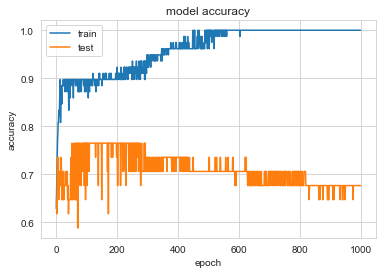

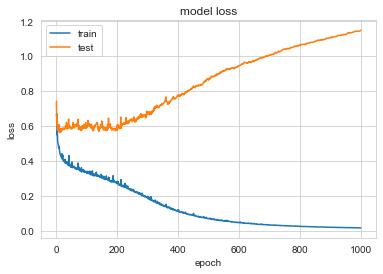

In [158]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# AS We can see our model is overfittng
# We need to find a solution to resolve it
# Let's create 2 more models and see how it does


In [252]:
# Smaller model
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(X_test.shape[1],)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

smaller_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 4)                 56        
_________________________________________________________________
dense_20 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 5         
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [ ]:
smaller_history = smaller_model.fit(X_train, y_train, epochs=1000, verbose=1, validation_split=0.3)

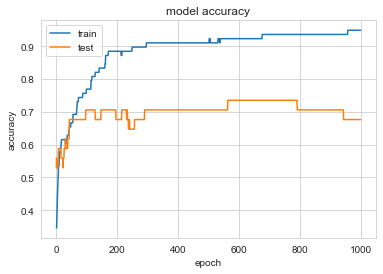

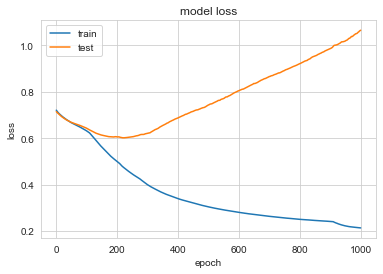

In [254]:
plt.plot(smaller_history.history['acc'])
plt.plot(smaller_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(smaller_history.history['loss'])
plt.plot(smaller_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [255]:
# Bigger model with 2 hidden layers
bigger_model = keras.models.Sequential([
    keras.layers.Dense(32, activation=tf.nn.relu, input_shape=(X_test.shape[1],)),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 32)                448       
_________________________________________________________________
dense_23 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_24 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 33        
Total params: 2,593
Trainable params: 2,593
Non-trainable params: 0
_________________________________________________________________


In [ ]:
bigger_history = bigger_model.fit(X_train, y_train, epochs=1000, verbose=1, validation_split=0.3)

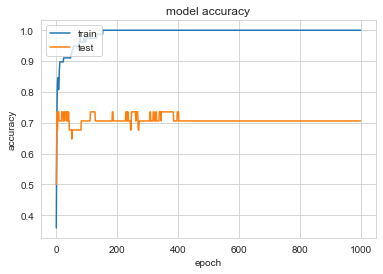

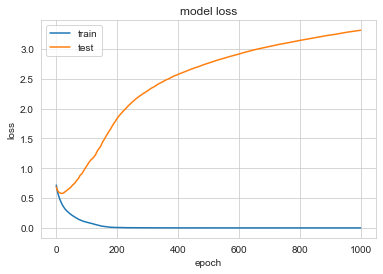

In [261]:
plt.plot(bigger_history.history['acc'])
plt.plot(bigger_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(bigger_history.history['loss'])
plt.plot(bigger_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

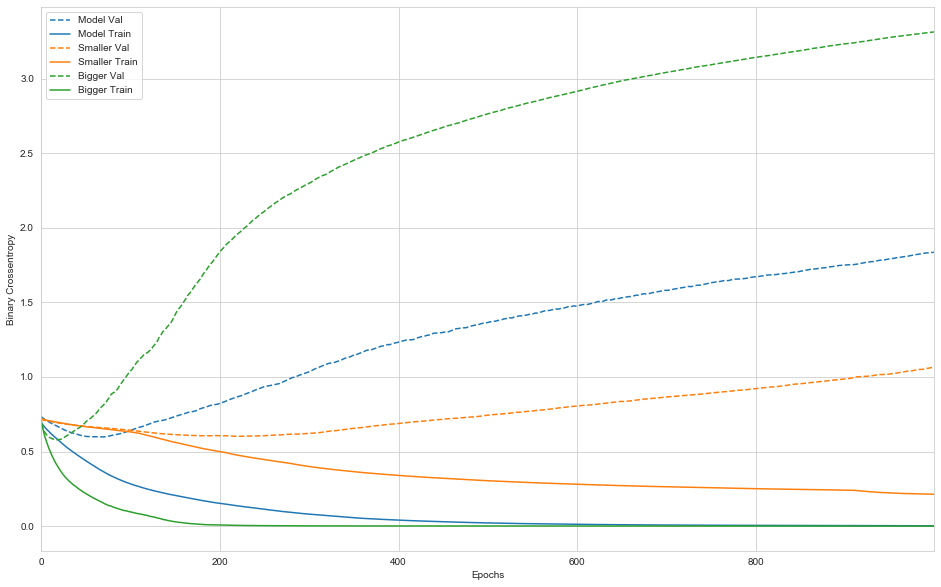

In [260]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))

  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('model', history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

In [ ]:
# As We could see the normal model had the best performance(about in 200 epoch)
# Bigger one tends to overfit more than smaller and normal one

## GENERAL CONCLUSIONS:
#### -The stronger impact on dependent variable seem to have amount_order and weird_provider_name variables
#### - Turned out that the best performance on our data has Logistic regression with .083 accuracy on test data

## APPENDIX(JUST FOR FUN)

In [137]:
# Now lets's see what happens if We just feed ML model with the data as it is with no any preprocessing
# Uber's ludwig open source provides possibility to do machine learning with no code.
# Let's see how it does

In [393]:
from ludwig.api import LudwigModel
import ludwig





The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.




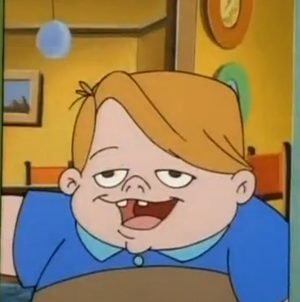

In [138]:
# Now defining ludwidg model with the input with no tuning

In [467]:
model_definition = {
    'input_features':[
        {'name':'customer', 'type':'text'},
        {'name':'orders', 'type':'text'},
        {'name':'paymentMethods', 'type':'text'},
        {'name':'transactions', 'type':'text'}
    ],
    'output_features': [
        {'name': 'fraudulent', 'type': 'category'}
    ]
}

In [398]:
print('creating model')
model = LudwigModel(model_definition)
print('training model')
train_stats = model.train(data_df=df_raw)
model.close()

creating model
training model





Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor








In [399]:
import ludwig.visualize

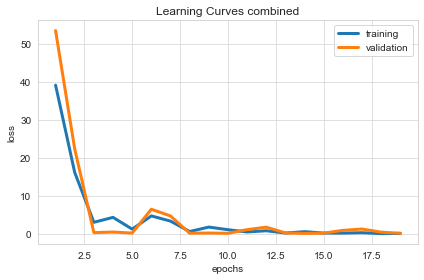

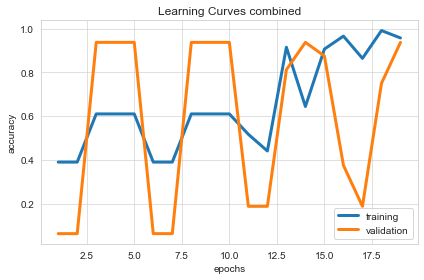

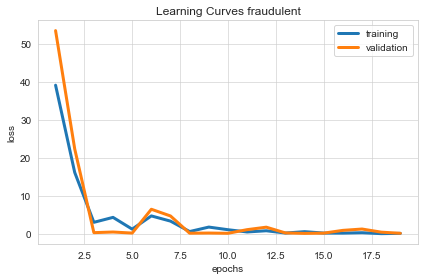

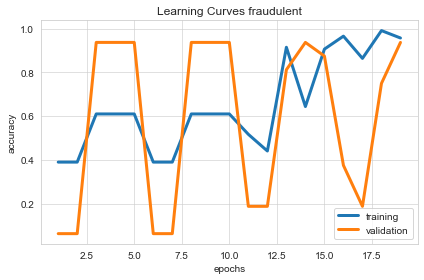

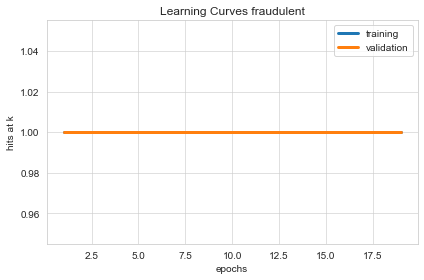

In [400]:
ludwig.visualize.learning_curves(
  train_stats,
  field = True
)

In [134]:
# As we can see after 18 epochs model has almost 100% accuracy :)
# As it's just for fun leave it without any comment.